In [2]:
import csv
import tensorflowjs as tfjs
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%load_ext tensorboard
import pandas as pd
import tensorflow as tf
import datetime

RANDOM_SEED = 42

# 各パス指定

In [31]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

In [32]:
import pandas as pd
df = pd.read_csv(dataset, header=None, low_memory=False, decimal=',')

# 分類数設定

In [43]:
NUM_CLASSES = 28

# ĐỌC DỮ LIỆU

In [81]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, 21*2 + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# TẠO MODEL

In [161]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dense(200),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(400),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(1200),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(600),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(300),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [162]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 200)               8600      
_________________________________________________________________
batch_normalization_85 (Batc (None, 200)               800       
_________________________________________________________________
activation_85 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 400)               80400     
_________________________________________________________________
batch_normalization_86 (Batc (None, 400)               1600      
_________________________________________________________________
activation_86 (Activation)   (None, 400)             

In [167]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1)

In [168]:
model.compile(
    optimizer='Nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# HUẤN LUYỆN MODEL

In [169]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [170]:
import time
startTime = time.time()

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[cp_callback, es_callback,tensorboard_callback]
)
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))


Epoch 1/100
909/909 [==============================] - ETA: 0s - loss: 0.1941 - accuracy: 0.9354
Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
909/909 [==============================] - 49s 53ms/step - loss: 0.1941 - accuracy: 0.9354 - val_loss: 0.1370 - val_accuracy: 0.9606
Epoch 2/100
908/909 [============================>.] - ETA: 0s - loss: 0.1815 - accuracy: 0.9383
Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
909/909 [==============================] - 59s 65ms/step - loss: 0.1815 - accuracy: 0.9383 - val_loss: 0.2220 - val_accuracy: 0.9259
Epoch 3/100
908/909 [============================>.] - ETA: 0s - loss: 0.1719 - accuracy: 0.9415
Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
909/909 [==============================] - 52s 58ms/step - loss: 0.1720 - accuracy: 0.9415 - val_loss: 0.0956 - val_accuracy: 0.9711
Epoch 4/100
908/909 [============================>.] - ETA: 0s - loss:

909/909 [==============================] - 48s 52ms/step - loss: 0.0903 - accuracy: 0.9685 - val_loss: 0.0454 - val_accuracy: 0.9857
Epoch 27/100
908/909 [============================>.] - ETA: 0s - loss: 0.0871 - accuracy: 0.9701
Epoch 00027: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
909/909 [==============================] - 48s 52ms/step - loss: 0.0871 - accuracy: 0.9701 - val_loss: 0.0423 - val_accuracy: 0.9869
Epoch 28/100
909/909 [==============================] - ETA: 0s - loss: 0.0839 - accuracy: 0.9712
Epoch 00028: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
909/909 [==============================] - 48s 52ms/step - loss: 0.0839 - accuracy: 0.9712 - val_loss: 0.0479 - val_accuracy: 0.9846
Epoch 29/100
908/909 [============================>.] - ETA: 0s - loss: 0.0823 - accuracy: 0.9719
Epoch 00029: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
909/909 [==============================] - 47s 51ms/step - loss: 0.

Epoch 53/100
908/909 [============================>.] - ETA: 0s - loss: 0.0622 - accuracy: 0.9781
Epoch 00053: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
909/909 [==============================] - 55s 61ms/step - loss: 0.0622 - accuracy: 0.9781 - val_loss: 0.0342 - val_accuracy: 0.9891
Epoch 54/100
908/909 [============================>.] - ETA: 0s - loss: 0.0613 - accuracy: 0.9787
Epoch 00054: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
909/909 [==============================] - 57s 63ms/step - loss: 0.0613 - accuracy: 0.9787 - val_loss: 0.0308 - val_accuracy: 0.9913
Epoch 55/100
908/909 [============================>.] - ETA: 0s - loss: 0.0597 - accuracy: 0.9791
Epoch 00055: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
909/909 [==============================] - 57s 62ms/step - loss: 0.0597 - accuracy: 0.9791 - val_loss: 0.0301 - val_accuracy: 0.9909
Epoch 56/100
908/909 [============================>.] - ETA: 0s - l

Epoch 79/100
909/909 [==============================] - ETA: 0s - loss: 0.0484 - accuracy: 0.9833
Epoch 00079: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
909/909 [==============================] - 56s 62ms/step - loss: 0.0484 - accuracy: 0.9833 - val_loss: 0.0267 - val_accuracy: 0.9920
Epoch 80/100
908/909 [============================>.] - ETA: 0s - loss: 0.0496 - accuracy: 0.9828
Epoch 00080: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
909/909 [==============================] - 58s 64ms/step - loss: 0.0496 - accuracy: 0.9828 - val_loss: 0.0299 - val_accuracy: 0.9902
Epoch 81/100
908/909 [============================>.] - ETA: 0s - loss: 0.0473 - accuracy: 0.9838 ETA: 
Epoch 00081: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
909/909 [==============================] - 61s 67ms/step - loss: 0.0474 - accuracy: 0.9838 - val_loss: 0.0254 - val_accuracy: 0.9926
Epoch 82/100
908/909 [============================>.] - ETA: 

In [ ]:
%tensorboard --logdir logs/fit

In [172]:
# ĐÁNH GIÁ
val_loss, val_acc = model.evaluate(X_val, y_val, batch_size=128)

303/303 [==============================] - 5s 15ms/step - loss: 0.0404 - accuracy: 0.9876


In [173]:
model.save(r"C:\Users\ayk_1\PycharmProjects\hand-gesture-recognition-using-mediapipe\trained_model.hdf5")

In [174]:
# LOAD MODEL
model = tf.keras.models.load_model(model_save_path)

In [175]:
# TEST
predict_result = model.predict(np.array([X_val[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[2.6385900e-09 1.0673390e-11 1.9841061e-13 3.4507163e-13 2.6012734e-12
 7.5019431e-14 8.8148482e-11 2.9828357e-08 1.7054055e-06 8.7158260e-11
 9.9037402e-17 1.7501229e-09 2.0409617e-11 4.3953429e-18 1.9317659e-14
 3.9000234e-16 2.4294954e-12 6.3523498e-09 7.9922120e-13 3.0602618e-10
 2.5495532e-09 1.2255899e-12 4.5210441e-12 3.7324215e-14 9.9999821e-01
 7.1201751e-12 5.7174827e-11 3.6730005e-14]
24


# 混同行列

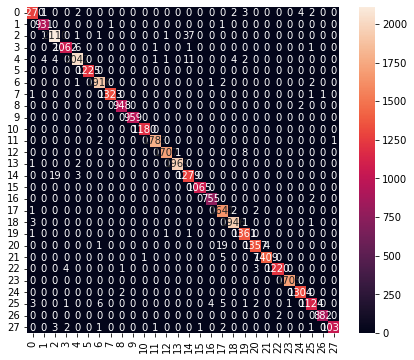

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1284
           1       0.99      1.00      1.00       933
           2       0.99      0.98      0.98      2151
           3       0.99      0.99      0.99      1073
           4       0.99      0.99      0.99      2069
           5       1.00      1.00      1.00      1225
           6       0.99      1.00      1.00      1922
           7       1.00      1.00      1.00      1326
           8       1.00      1.00      1.00       950
           9       1.00      1.00      1.00       961
          10       1.00      1.00      1.00      1180
          11       1.00      1.00      1.00      1786
          12       1.00      0.99      1.00      1716
          13       1.00      1.00      1.00      1972
          14       0.96      0.98      0.97      1301
          15       1.00      1.00      1.00      1065
          16       0.99      1.00      1.00       757
     

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_val, y_pred))

Y_pred = model.predict(X_val)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_val, y_pred)

# CHUYỂN SANG Tensorflow-Lite

In [177]:
model.save(model_save_path, include_optimizer=False)

In [178]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\ayk_1\AppData\Local\Temp\tmpu1ee325y\assets


1491504

# TEST

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
input_details

In [ ]:
np.shape(np.array([X_test[0]]))

In [ ]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))